El nodo con el desplazamiento maximo es:  [87 90]
El combo con el desplazamiento maximo es:  [3 3]
El nodo con el desplazamiento minimo es:  [719]
El combo con el desplazamiento minimo es:  [1]
El nodo con el esfuerzo maximo es:  [87 90]
El combo con el esfuerzo maximo es:  [3 3]
El nodo con el esfuerzo minimo es:  [719]
El combo con el esfuerzo minimo es:  [1]

Desplazamientos: 


,0,1,2,3,4
0,-0.003206,-0.003420,-0.003636,-0.000672,-0.000888
1,-0.003249,-0.003431,-0.003671,-0.000657,-0.000896
2,-0.003275,-0.003391,-0.003693,-0.000599,-0.000902
3,-0.003422,-0.003948,-0.003831,-0.001053,-0.000935
4,-0.003068,-0.004352,-0.003562,-0.001660,-0.000870
...,...,...,...,...,...
1204,-0.003063,-0.003658,-0.003502,-0.001011,-0.000855
1205,-0.003063,-0.003659,-0.003502,-0.001012,-0.000855
1206,-0.003062,-0.003659,-0.003502,-0.001012,-0.000855
1207,-0.003062,-0.003659,-0.003502,-0.001012,-0.000855



 Valores de qs: 


,0,1,2,3,4
0,-5.7708,-6.1560,-6.5448,-1.2096,-1.5984
1,-5.8482,-6.1758,-6.6078,-1.1826,-1.6128
2,-5.8950,-6.1038,-6.6474,-1.0782,-1.6236
3,-6.1596,-7.1064,-6.8958,-1.8954,-1.6830
4,-5.5224,-7.8336,-6.4116,-2.9880,-1.5660
...,...,...,...,...,...
1204,-5.5134,-6.5844,-6.3036,-1.8198,-1.5390
1205,-5.5134,-6.5862,-6.3036,-1.8216,-1.5390
1206,-5.5116,-6.5862,-6.3036,-1.8216,-1.5390
1207,-5.5116,-6.5862,-6.3036,-1.8216,-1.5390



Desplazamientos por nodo


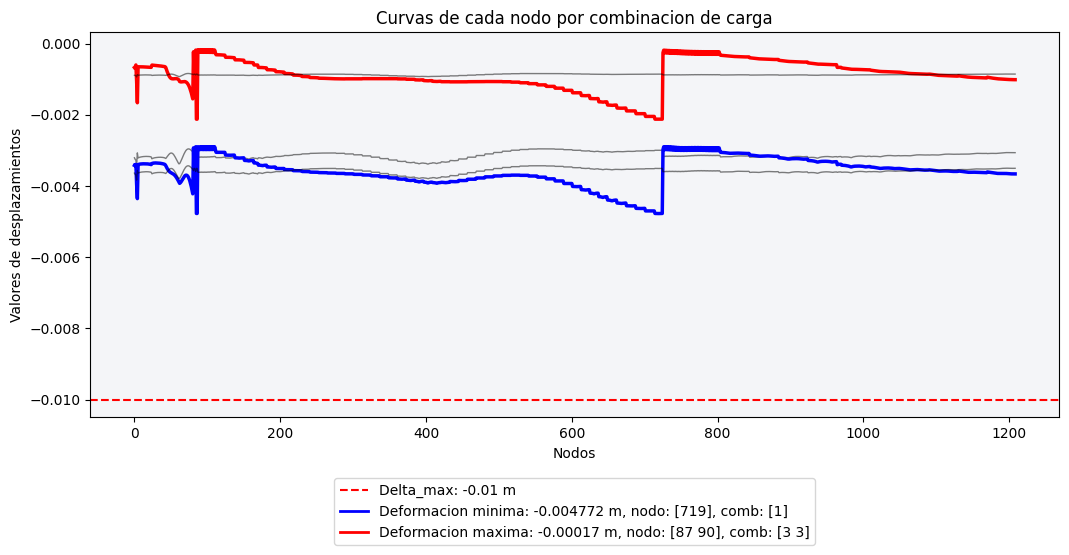


Valores de qs


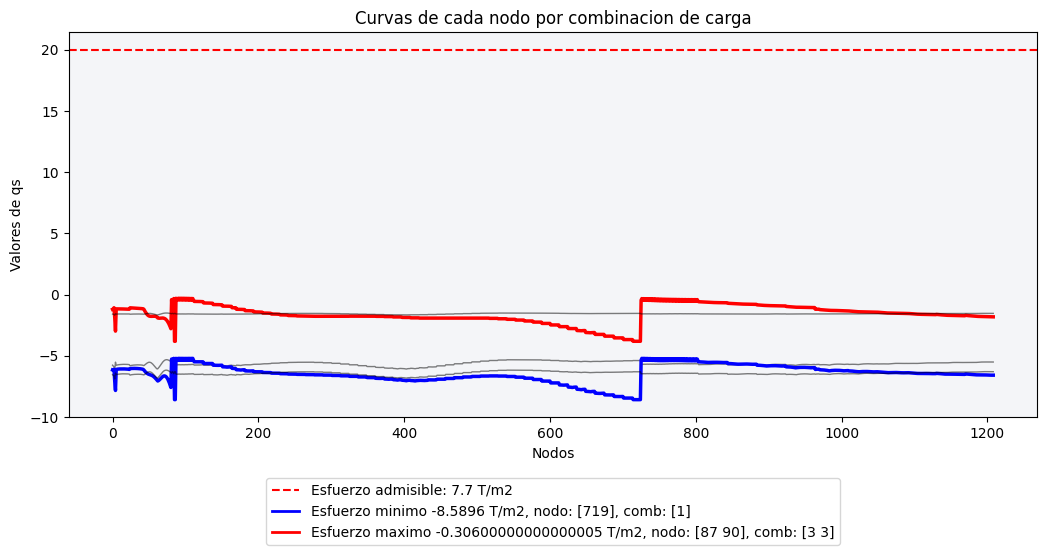

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





#Variables
B = 1800 # [T/m^3]
qa = 7.7  # [T/m^2]
delta_max = -0.01   #m
comb = 5
nodes = 1208

#Importación de datos  (Con balasto = 4750)
Uxyz = pd.read_excel(r'C:\Users\USUARIO\Desktop\Python\Jupyter\Cimentaciones\Cimentaciones\Dato_Robot\comb completo.xlsx', sheet_name='Joint Displacements')
Uz = Uxyz.iloc[2:, 7].values.astype(float)
n = (len(Uz) // comb) * comb
Uz = Uz[:n]
#print(Uz.shape)

n_filas_D = len(Uz) // comb
n_columnas_D = comb
D = np.empty((n_filas_D, n_columnas_D))
qs = np.empty((n_filas_D, n_columnas_D))
#print(D.shape)

for j in range(0, comb):
    D[:,j] = Uz[j::comb]
    qs[:,j] = D[:,j]*B      #balasto = 4750 T/m3


D_max = np.max(D)
qs_max = np.max(qs)

D_min = np.min(D)
qs_min = np.min(qs)

val_desplazamiento_max = np.where(D == D_max)
val_desplazamiento_min = np.where(D == D_min)

val_esfuerzo_max = np.where(qs == qs_max)
val_esfuerzo_min = np.where(qs == qs_min)

nod_despMax = val_desplazamiento_max[0]
comb_despMax = val_desplazamiento_max[1]
nod_despMin = val_desplazamiento_min[0]
comb_despMin = val_desplazamiento_min[1]

nod_esfMax = val_esfuerzo_max[0]
comb_esfMax = val_esfuerzo_max[1]
nod_esfMin = val_esfuerzo_min[0]
comb_esfMin = val_esfuerzo_min[1]


print('El nodo con el desplazamiento maximo es: ', nod_despMax)
print('El combo con el desplazamiento maximo es: ', comb_despMax)
print('El nodo con el desplazamiento minimo es: ', nod_despMin)
print('El combo con el desplazamiento minimo es: ', comb_despMin)
print('El nodo con el esfuerzo maximo es: ', nod_esfMax)
print('El combo con el esfuerzo maximo es: ', comb_esfMax)
print('El nodo con el esfuerzo minimo es: ', nod_esfMin)
print('El combo con el esfuerzo minimo es: ', comb_esfMin)


df_D = pd.DataFrame(D)
df_qs = pd.DataFrame(qs)
print(f'\nDesplazamientos: ')
display(df_D)
print(f'\n Valores de qs: ')
display(df_qs)


#Create plot for displacements
print(f'\nDesplazamientos por nodo')
fig, ax = plt.subplots(figsize=(12.5, 5))
ax.set_facecolor('#F4F5F8')

for i in range(0, comb):
    if i == comb_despMax[0]:
        ax.plot(D[:, i], label=f"Combinacion {i+1}", color='red', linewidth=2.5, alpha=1) 
        #ax.scatter(nod_despMax,D_max, color='red', s=100, marker='o', label='Maximum')Dsp_mx_cmb1=-0,00369m
    elif  i == comb_despMin[0]:
        ax.plot(D[:, i], label=f"Combinacion {i+1}", color='blue', linewidth=2.5, alpha=1)
        #ax.scatter(nod_despMin, D_min, color='blue', s=100, marker='o', label='Maximum')Dsp_min_cmb2=-0,002442m
    else:
        ax.plot(D[:, i], label=f"Combinacion {i+1}", color='black', linewidth=1, alpha=0.5)


Deformacion_max = ax.axhline(y=delta_max, color='r', linestyle='--', label=f'Delta_max: {delta_max} m')

# Add the legend outside the graph
Deformacion_max_2 = ax.plot([], [], color='red', linewidth=2, label=f'Deformacion maxima: {D_max} m, nodo: {nod_despMax}, comb: {comb_despMax}')
Deformacion_min = ax.plot([], [], color='blue', linewidth=2, label=f'Deformacion minima: {D_min} m, nodo: {nod_despMin}, comb: {comb_despMin}')
ax.legend(handles=[Deformacion_max, Deformacion_min[0], Deformacion_max_2[0]],  loc="lower center", bbox_to_anchor=(0.5, -0.35), ncol=1)

ax.set_xlabel("Nodos")
ax.set_ylabel("Valores de desplazamientos")
ax.set_title("Curvas de cada nodo por combinacion de carga")
plt.show()


#create plot for strain
print(f'\nValores de qs')
fig, ax = plt.subplots(figsize=(12.5, 5))
ax.set_facecolor('#F4F5F8')

for i in range(0, comb):
    if i == comb_esfMax[0]:
        ax.plot(qs[:, i], label=f"Combinacion {i+1}", color='red', linewidth=2.5, alpha=1)
       # ax.scatter(Esf_mx_cmb1:6,642T/m2(nod_esfMax, qs_max, color='red', s=100, marker='o', label='Maximum')
    elif  i == comb_despMin[0]:
        ax.plot(qs[:, i], label=f"Combinacion {i+1}", color='blue', linewidth=2.5, alpha=1)
       # ax.scatter(Esf_mx_cmb5:4,120T/m2(nod_esfMin, qs_min, color='blue', s=100, marker='o', label='Maximum')
    else:
        ax.plot(qs[:, i], label=f"Combinacion {i+1}", color='black', linewidth=1, alpha=0.5)


esfuerzo_max = ax.axhline(y=20, color='r', linestyle='--', label=f'Esfuerzo admisible: {qa} T/m2')

# Add the %esfs:11,5798, legend outside the graph
esfuerzo_max_2 = ax.plot([], [], color='red', linewidth=2, label=f'Esfuerzo maximo {qs_max} T/m2, nodo: {nod_esfMax}, comb: {comb_esfMax}')
esfuerzo_min = ax.plot([], [], color='blue', linewidth=2, label=f'Esfuerzo minimo {qs_min} T/m2, nodo: {nod_esfMin}, comb: {comb_esfMin}')
ax.legend(handles=[esfuerzo_max, esfuerzo_min[0], esfuerzo_max_2[0]], loc="lower center", bbox_to_anchor=(0.5, -0.35), ncol=1)


ax.set_xlabel("Nodos")
ax.set_ylabel("Valores de qs")
ax.set_title("Curvas de cada nodo por combinacion de carga")
plt.show()


<img src='./images/resp.png'>